In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
data = pd.read_csv("State_Custom_Data.csv")

In [65]:
data.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,State,Alabama,All,2020-21,40,8.7,0,96,"1,105",> 100%
1,State,Alabama,All,2020-21,41,8.9,1,107,"1,216",> 100%
2,State,Alabama,All,2020-21,42,7.7,0,92,"1,192",> 100%
3,State,Alabama,All,2020-21,43,9.5,1,107,"1,136",> 100%
4,State,Alabama,All,2020-21,44,9.6,0,111,"1,162",> 100%


In [66]:
data.tail()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
19651,State,New York City,All,2013-14,35,7.7,0,70,912,89.5%
19652,State,New York City,All,2013-14,36,9.6,0,95,993,97.4%
19653,State,New York City,All,2013-14,37,7.9,0,69,877,86%
19654,State,New York City,All,2013-14,38,8.6,0,82,953,93.5%
19655,State,New York City,All,2013-14,39,9.2,0,89,971,95.3%


In [67]:
dataf = data[data["SUB AREA"] == "Florida"]
datac = data[data["SUB AREA"] == "California"]

In [68]:
data_florida.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
117,State,Florida,All,2020-21,40,9.0,1,388,"4,335",> 100%
118,State,Florida,All,2020-21,41,9.2,0,414,"4,491",> 100%
119,State,Florida,All,2020-21,42,9.7,0,423,"4,355",> 100%
120,State,Florida,All,2020-21,43,8.9,1,382,"4,318",> 100%
121,State,Florida,All,2020-21,44,9.3,0,394,"4,233",> 100%


In [69]:
data2013f = dataf[dataf.SEASON == "2013-14"]
data2014f = dataf[dataf.SEASON == "2014-15"]
data2015f = dataf[dataf.SEASON == "2015-16"]
data2016f = dataf[dataf.SEASON == "2016-17"]
data2017f = dataf[dataf.SEASON == "2017-18"]
data2018f = dataf[dataf.SEASON == "2018-19"]
data2019f = dataf[dataf.SEASON == "2019-20"]
data2020f = dataf[dataf.SEASON == "2020-21"]

dataf_array = [data2013f,
             data2014f,
             data2015f,
             data2016f,
             data2017f,
             data2018f,
             data2019f,
             data2020f]

data2013c = datac[datac.SEASON == "2013-14"]
data2014c = datac[datac.SEASON == "2014-15"]
data2015c = datac[datac.SEASON == "2015-16"]
data2016c = datac[datac.SEASON == "2016-17"]
data2017c = datac[datac.SEASON == "2017-18"]
data2018c = datac[datac.SEASON == "2018-19"]
data2019c = datac[datac.SEASON == "2019-20"]
data2020c = datac[datac.SEASON == "2020-21"]

datac_array = [data2013c,
             data2014c,
             data2015c,
             data2016c,
             data2017c,
             data2018c,
             data2019c,
             data2020c]

Text(0.5, 1.0, 'Total Florida Deaths per week')

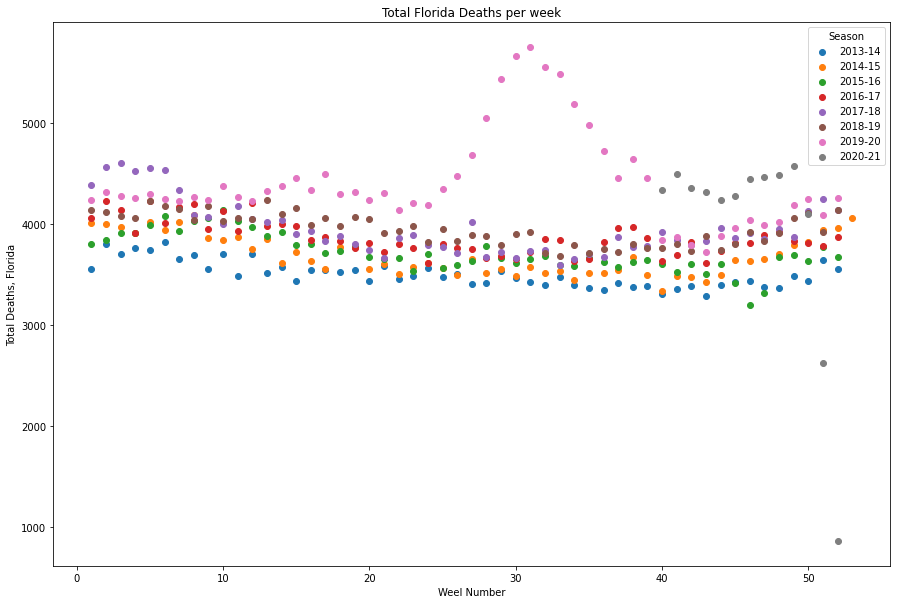

In [70]:
plt.figure(figsize=(15,10))
legend = []
for yearly_data in dataf_array:
    week_number = yearly_data.WEEK.values
    death_count_strings = yearly_data["TOTAL DEATHS"].values
    death_count = [int(death_count.replace(',','')) for death_count in death_count_strings]
    plt.scatter(week_number, death_count)
    
    legend.append(yearly_data.SEASON.values[0])
    
plt.legend(legend, title = "Season")
plt.ylabel("Total Deaths, Florida")
plt.xlabel("Weel Number")
plt.title("Total Florida Deaths per week")

Text(0.5, 1.0, 'Total Florida Deaths per week')

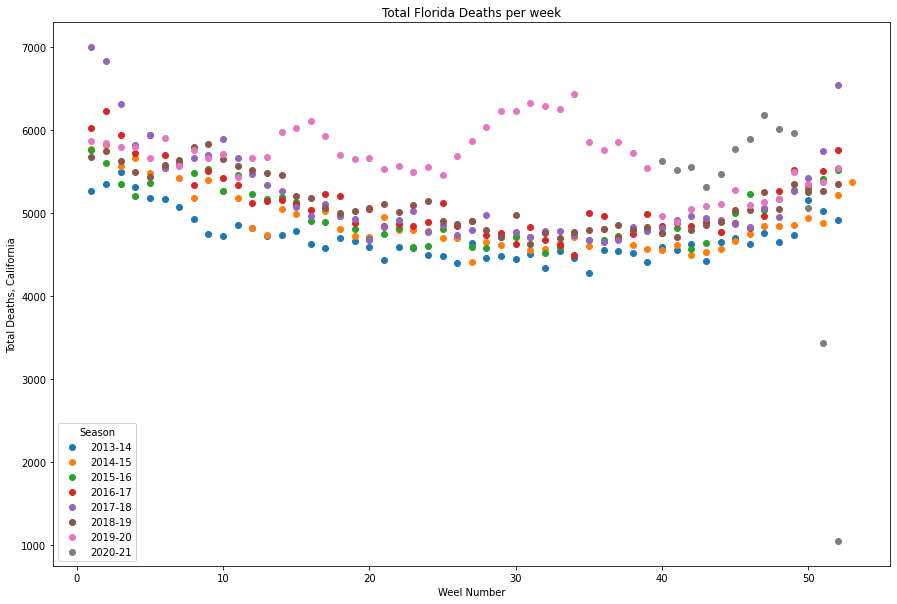

In [71]:
plt.figure(figsize=(15,10))
legend = []
for yearly_data in datac_array:
    week_number = yearly_data.WEEK.values
    death_count_strings = yearly_data["TOTAL DEATHS"].values
    death_count = [int(death_count.replace(',','')) for death_count in death_count_strings]
    plt.scatter(week_number, death_count)
    
    legend.append(yearly_data.SEASON.values[0])
    
plt.legend(legend, title = "Season")
plt.ylabel("Total Deaths, California")
plt.xlabel("Weel Number")
plt.title("Total Florida Deaths per week")

In [72]:
# calculate average and standard deviation of each week in non-covid period
week_numbers = set(dataf.WEEK.values)
average = []
standard_dev = []

for week in week_numbers:
    # remove covid related data
    data = dataf[dataf["SEASON"] != "2020-21"]
    data = data[data["SEASON"] != "2019-20"]
    
    # get weekly death data across remaining seasons and convert from strings to integers
    weekXdata = data[data["WEEK"]== week]["TOTAL DEATHS"].values
    weekXdata = [int(deaths.replace(',','')) for deaths in weekXdata]
    
    # calculate statistics 
    average.append(np.mean(weekXdata))
    standard_dev.append(np.std(weekXdata))
    
averagef = np.array(average)
std_devf = np.array(standard_dev)

Text(0.5, 1.0, 'Total Florida Deaths per week')

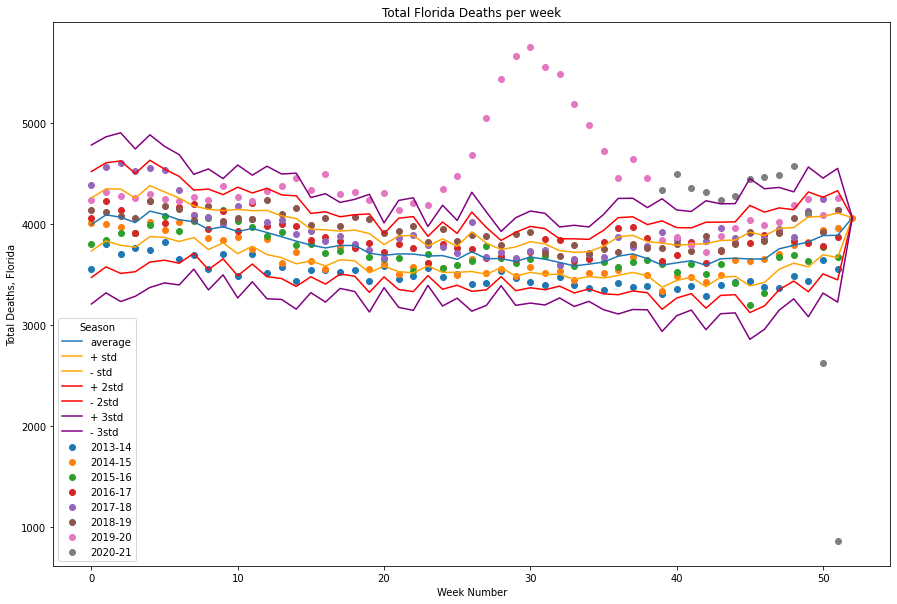

In [73]:
plt.figure(figsize=(15,10))
legend = []
for yearly_data in dataf_array:
    week_number = yearly_data.WEEK.values
    death_count_strings = yearly_data["TOTAL DEATHS"].values
    death_count = [int(death_count.replace(',','')) for death_count in death_count_strings]
    plt.scatter(week_number - 1, death_count)
    
    legend.append(yearly_data.SEASON.values[0])

plt.plot(averagef)
plt.plot(averagef + std_devf, color = 'orange')
plt.plot(averagef - std_devf, color = 'orange')
plt.plot(averagef + 2*std_devf, color = 'red')
plt.plot(averagef - 2*std_devf, color = 'red')
plt.plot(averagef + 3*std_devf, color = 'purple')
plt.plot(averagef - 3*std_devf, color = 'purple')
stat_legend = ['average','+ std','- std','+ 2std','- 2std','+ 3std','- 3std']

plt.legend(stat_legend+legend, title = "Season")
plt.ylabel("Total Deaths, Florida")
plt.xlabel("Week Number")
plt.title("Total Florida Deaths per week")

In [77]:
# calculate average and standard deviation of each week in non-covid period
week_numbers = set(datac.WEEK.values)
average = []
standard_dev = []

for week in week_numbers:
    # remove covid related data
    data = datac[datac["SEASON"] != "2020-21"]
    data = data[data["SEASON"] != "2019-20"]
    
    # get weekly death data across remaining seasons and convert from strings to integers
    weekXdata = data[data["WEEK"]== week]["TOTAL DEATHS"].values
    weekXdata = [int(deaths.replace(',','')) for deaths in weekXdata]
    
    # calculate statistics 
    average.append(np.mean(weekXdata))
    standard_dev.append(np.std(weekXdata))
    
averagec = np.array(average)
std_devc = np.array(standard_dev)

Text(0.5, 1.0, 'Total California Deaths per week')

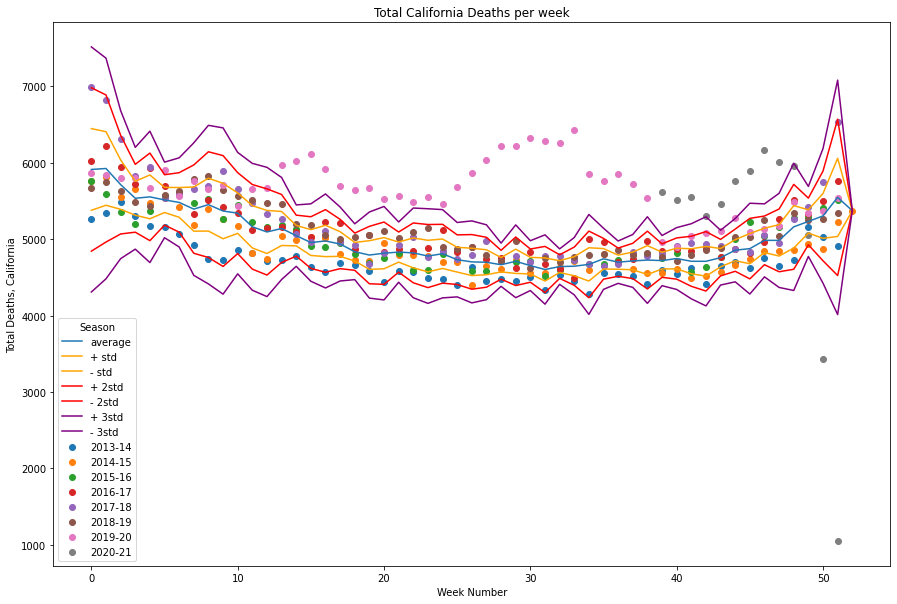

In [79]:
plt.figure(figsize=(15,10))
legend = []
for yearly_data in datac_array:
    week_number = yearly_data.WEEK.values
    death_count_strings = yearly_data["TOTAL DEATHS"].values
    death_count = [int(death_count.replace(',','')) for death_count in death_count_strings]
    plt.scatter(week_number - 1, death_count)
    
    legend.append(yearly_data.SEASON.values[0])

plt.plot(averagec)
plt.plot(averagec + std_devc, color = 'orange')
plt.plot(averagec - std_devc, color = 'orange')
plt.plot(averagec + 2*std_devc, color = 'red')
plt.plot(averagec - 2*std_devc, color = 'red')
plt.plot(averagec + 3*std_devc, color = 'purple')
plt.plot(averagec - 3*std_devc, color = 'purple')
stat_legend = ['average','+ std','- std','+ 2std','- 2std','+ 3std','- 3std']

plt.legend(stat_legend+legend, title = "Season")
plt.ylabel("Total Deaths, California")
plt.xlabel("Week Number")
plt.title("Total California Deaths per week")

In [80]:
# it's hard to tell if Cali or Florida have statistically different treatments.
# One way we can try to find this is to fit a curve to the death data during non-covid
# periods such that we have an unbiased distribution of errors. Then, we compare the 
# covid samples to this distribution. 

# Let's simply try this with the average as our "fit", since we have that already. 

In [99]:
# calculate average and standard deviation of each week in non-covid period
week_numbers = set(dataf.WEEK.values)
errorsf = np.array([])

for week in week_numbers:
    # remove covid related data
    data = dataf[dataf["SEASON"] != "2020-21"]
    data = data[data["SEASON"] != "2019-20"]
    
    # get weekly death data across remaining seasons and convert from strings to integers
    weekXdata = data[data["WEEK"]== week]["TOTAL DEATHS"].values
    weekXdata = [int(deaths.replace(',','')) for deaths in weekXdata]
    
    # calculate errors
    weekly_errors = np.array(weekXdata)- np.mean(weekXdata)
    
    # store error data
    errorsf = np.concatenate((errorsf, weekly_errors), axis=None)
    

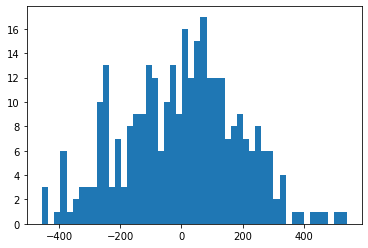

In [103]:
plt.hist(errorsf, bins=50);

In [104]:
# calculate average and standard deviation of each week in non-covid period
week_numbers = set(datac.WEEK.values)
errorsc = np.array([])

for week in week_numbers:
    # remove covid related data
    data = datac[datac["SEASON"] != "2020-21"]
    data = data[data["SEASON"] != "2019-20"]
    
    # get weekly death data across remaining seasons and convert from strings to integers
    weekXdata = data[data["WEEK"]== week]["TOTAL DEATHS"].values
    weekXdata = [int(deaths.replace(',','')) for deaths in weekXdata]
    
    # calculate errors
    weekly_errors = np.array(weekXdata)- np.mean(weekXdata)
    
    # store error data
    errorsc = np.concatenate((errorsc, weekly_errors), axis=None)
    

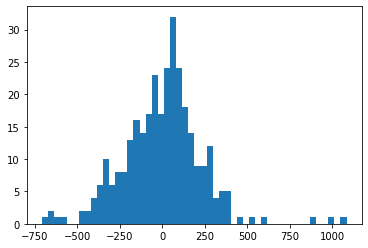

In [105]:
plt.hist(errorsc, bins=50);

In [106]:
# The data distributions for non-covid look to have some odd data points. 
# This is something that needs to be investigated before further analysis. 

# one hypothesis is that data isn't fully reported, particularly in 2013-14
dataf.tail()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
17467,State,Florida,All,2013-14,35,4.7,1,157,"3,366",91.7%
17468,State,Florida,All,2013-14,36,5.3,0,179,"3,347",91.2%
17469,State,Florida,All,2013-14,37,4.8,0,164,"3,409",92.9%
17470,State,Florida,All,2013-14,38,5.0,0,170,"3,374",91.9%
17471,State,Florida,All,2013-14,39,4.6,1,154,"3,379",92.1%


In [107]:
datac.tail()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
17207,State,California,All,2013-14,35,6.9,0,293,"4,276",87%
17208,State,California,All,2013-14,36,7.2,0,326,"4,555",92.7%
17209,State,California,All,2013-14,37,6.7,0,303,"4,542",92.4%
17210,State,California,All,2013-14,38,7.6,0,341,"4,513",91.8%
17211,State,California,All,2013-14,39,7.6,1,332,"4,407",89.7%


In [108]:
# The under-reporting may account for the low error anamolies.
# The high value anamolies may be accounted for by a high influenza/
# pneumonia season in 2017-18 which effected both states. 
# Also, population changes may have slowly drifted the numbers upwards (at least for Cali).

In [127]:
data = pd.read_csv("State_Custom_Data.csv")
set(data["SUB AREA"].values)

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'New York City',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

Text(0.5, 1.0, 'Total NYC Deaths per week')

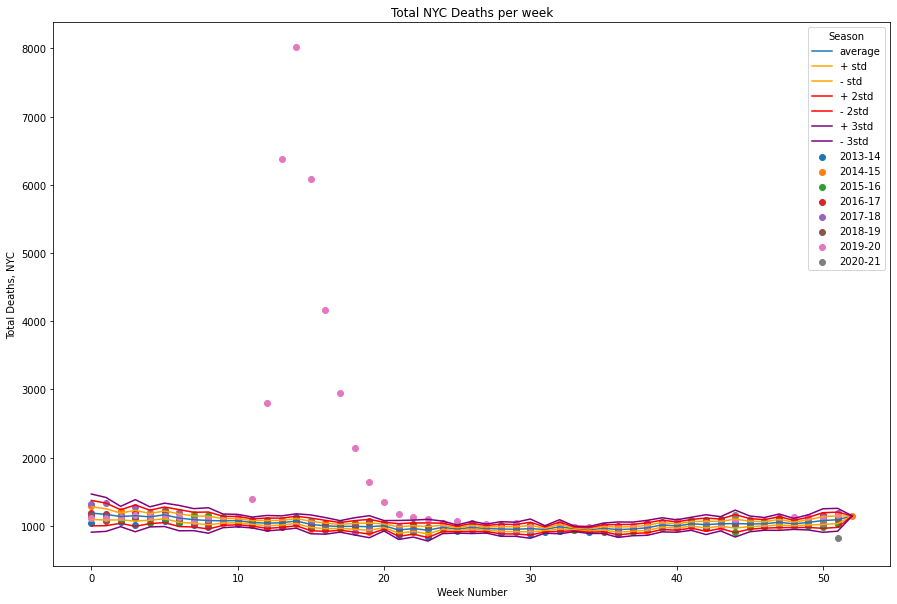

In [114]:
# Let's check out NY
datanyc = data[data["SUB AREA"] == "New York City"]

data2013nyc = datanyc[datanyc.SEASON == "2013-14"]
data2014nyc = datanyc[datanyc.SEASON == "2014-15"]
data2015nyc = datanyc[datanyc.SEASON == "2015-16"]
data2016nyc = datanyc[datanyc.SEASON == "2016-17"]
data2017nyc = datanyc[datanyc.SEASON == "2017-18"]
data2018nyc = datanyc[datanyc.SEASON == "2018-19"]
data2019nyc = datanyc[datanyc.SEASON == "2019-20"]
data2020nyc = datanyc[datanyc.SEASON == "2020-21"]

datanyc_array = [data2013nyc,
             data2014nyc,
             data2015nyc,
             data2016nyc,
             data2017nyc,
             data2018nyc,
             data2019nyc,
             data2020nyc]

# calculate average and standard deviation of each week in non-covid period
week_numbers = set(dataf.WEEK.values)
average = []
standard_dev = []

for week in week_numbers:
    # remove covid related data
    data = datanyc[datanyc["SEASON"] != "2020-21"]
    data = data[data["SEASON"] != "2019-20"]
    
    # get weekly death data across remaining seasons and convert from strings to integers
    weekXdata = data[data["WEEK"]== week]["TOTAL DEATHS"].values
    weekXdata = [int(deaths.replace(',','')) for deaths in weekXdata]
    
    # calculate statistics 
    average.append(np.mean(weekXdata))
    standard_dev.append(np.std(weekXdata))
    
averagenyc = np.array(average)
std_devnyc = np.array(standard_dev)

plt.figure(figsize=(15,10))
legend = []
for yearly_data in datanyc_array:
    week_number = yearly_data.WEEK.values
    death_count_strings = yearly_data["TOTAL DEATHS"].values
    death_count = [int(death_count.replace(',','')) for death_count in death_count_strings]
    plt.scatter(week_number - 1, death_count)
    
    legend.append(yearly_data.SEASON.values[0])

plt.plot(averagenyc)
plt.plot(averagenyc + std_devnyc, color = 'orange')
plt.plot(averagenyc - std_devnyc, color = 'orange')
plt.plot(averagenyc + 2*std_devnyc, color = 'red')
plt.plot(averagenyc - 2*std_devnyc, color = 'red')
plt.plot(averagenyc + 3*std_devnyc, color = 'purple')
plt.plot(averagenyc - 3*std_devnyc, color = 'purple')
stat_legend = ['average','+ std','- std','+ 2std','- 2std','+ 3std','- 3std']

plt.legend(stat_legend+legend, title = "Season")
plt.ylabel("Total Deaths, NYC")
plt.xlabel("Week Number")
plt.title("Total NYC Deaths per week")

In [142]:
def data_plots(area):
    data = pd.read_csv("State_Custom_Data.csv")
    
    data = data[data["SUB AREA"] == area]
    data = data[data["TOTAL DEATHS"] != 'Insufficient Data']

    data2013 = data[data.SEASON == "2013-14"]
    data2014 = data[data.SEASON == "2014-15"]
    data2015 = data[data.SEASON == "2015-16"]
    data2016 = data[data.SEASON == "2016-17"]
    data2017 = data[data.SEASON == "2017-18"]
    data2018 = data[data.SEASON == "2018-19"]
    data2019 = data[data.SEASON == "2019-20"]
    data2020 = data[data.SEASON == "2020-21"]

    data_array = [data2013,
                 data2014,
                 data2015,
                 data2016,
                 data2017,
                 data2018,
                 data2019,
                 data2020]

    # calculate average and standard deviation of each week in non-covid period
    week_numbers = set(data.WEEK.values)
    average = []
    standard_dev = []

    for week in week_numbers:
        # remove covid related data
        data = data[data["SEASON"] != "2020-21"]
        data = data[data["SEASON"] != "2019-20"]

        # get weekly death data across remaining seasons and convert from strings to integers
        weekXdata = data[data["WEEK"]== week]["TOTAL DEATHS"].values
        weekXdata = [int(deaths.replace(',','')) for deaths in weekXdata]

        # calculate statistics 
        average.append(np.mean(weekXdata))
        standard_dev.append(np.std(weekXdata))

    average = np.array(average)
    std_dev = np.array(standard_dev)

    plt.figure(figsize=(15,10))
    legend = []
    for yearly_data in data_array:
        week_number = yearly_data.WEEK.values
        death_count_strings = yearly_data["TOTAL DEATHS"].values
        death_count = [int(death_count.replace(',','')) for death_count in death_count_strings]
        plt.scatter(week_number - 1, death_count)

        legend.append(yearly_data.SEASON.values[0])

    plt.plot(average)
    plt.plot(average + std_dev, color = 'orange')
    plt.plot(average - std_dev, color = 'orange')
    plt.plot(average + 2*std_dev, color = 'red')
    plt.plot(average - 2*std_dev, color = 'red')
    plt.plot(average + 3*std_dev, color = 'purple')
    plt.plot(average - 3*std_dev, color = 'purple')
    stat_legend = ['average','+ std','- std','+ 2std','- 2std','+ 3std','- 3std']

    plt.legend(stat_legend+legend, title = "Season",bbox_to_anchor=(1,1), loc="upper left")
    plt.ylabel("Total Deaths, " + area)
    plt.xlabel("Week Number")
    plt.title("Total " + area + " Deaths per week")

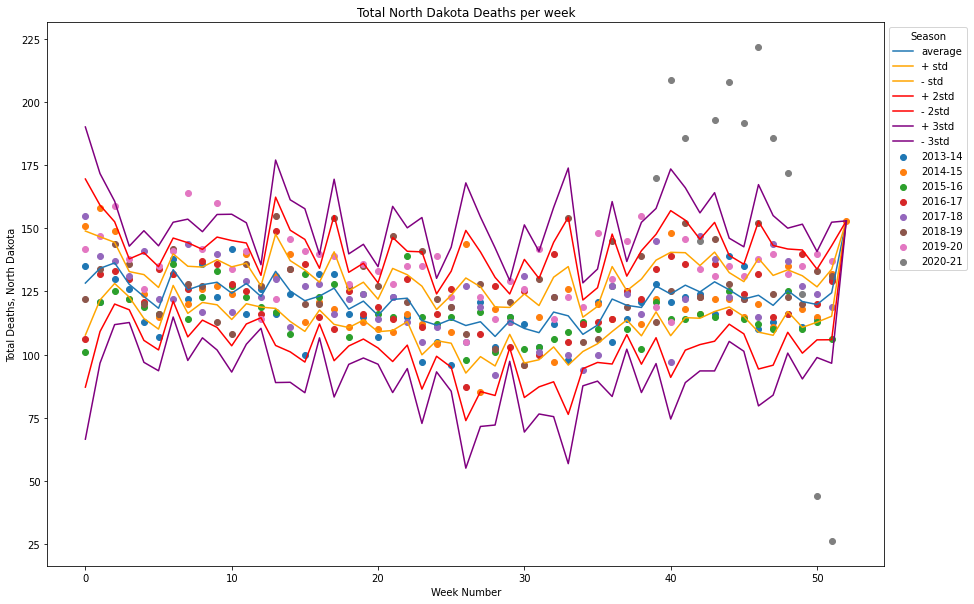

In [143]:
data_plots("North Dakota")

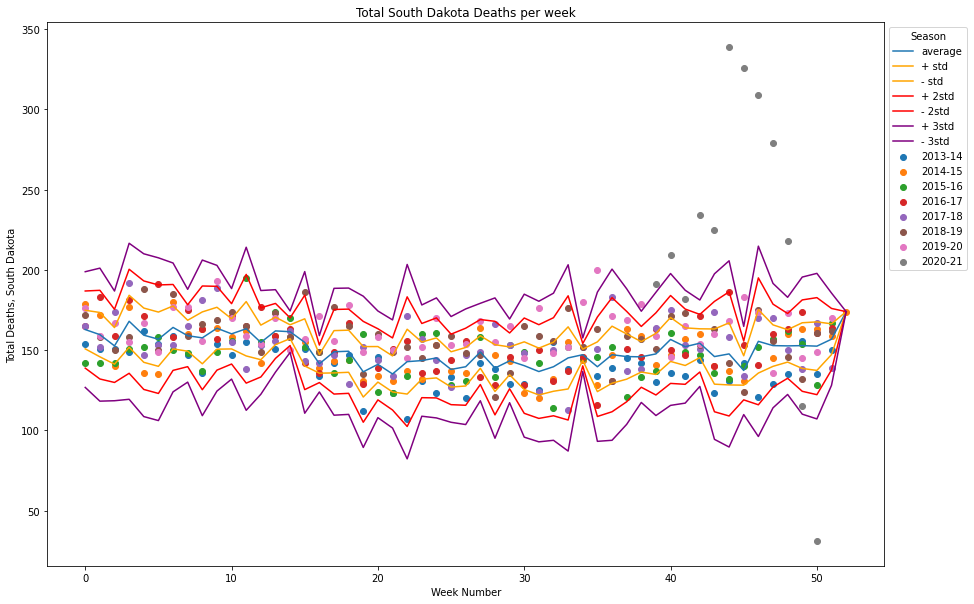

In [144]:
data_plots("South Dakota")

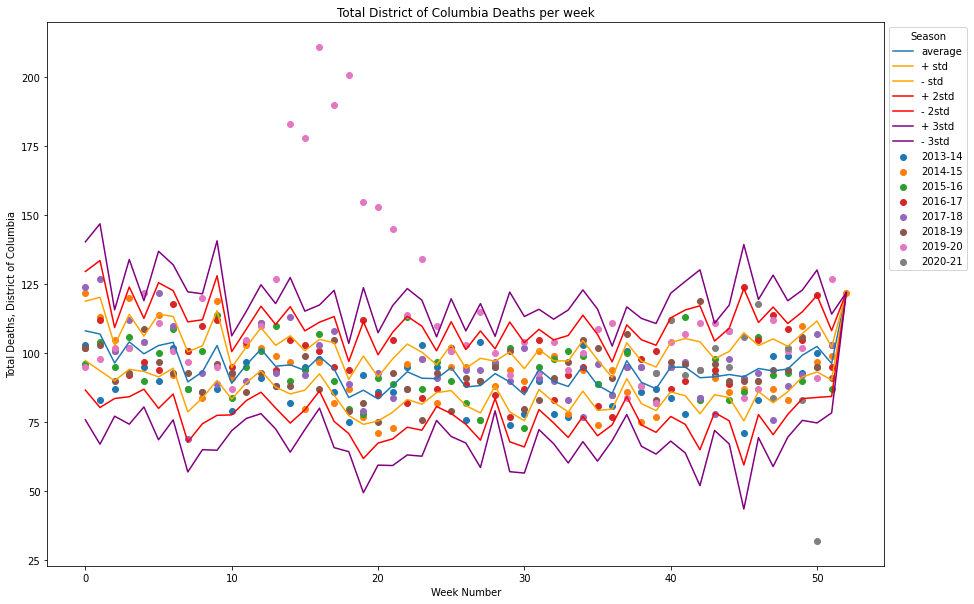

In [145]:
data_plots("District of Columbia")

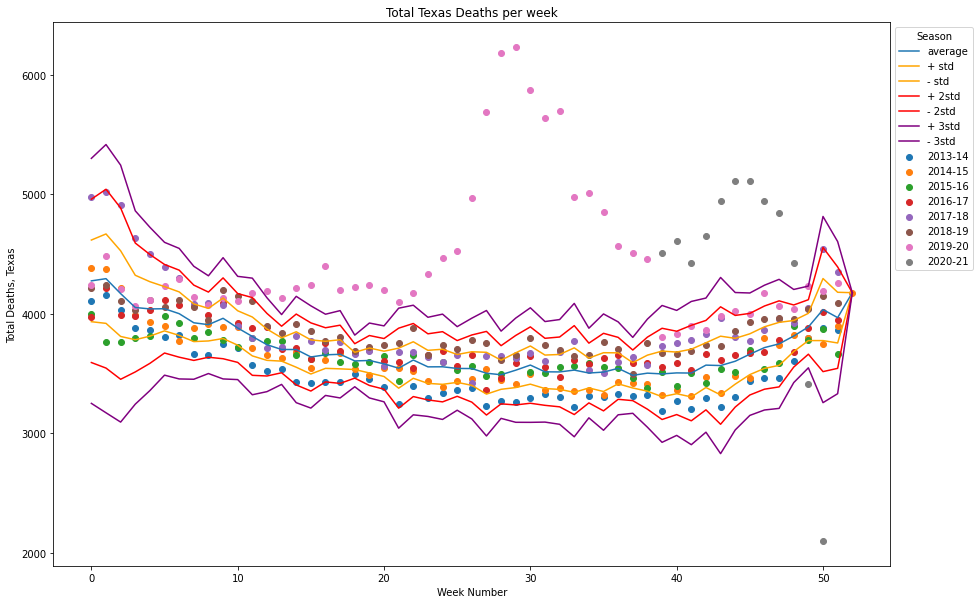

In [146]:
data_plots("Texas")

In [147]:
# to remove the large variations in weekly samples, we can directly compare the differences
# between california and florida on a weekly basis. From there, we can see if the previous
# year showed significant bias towards one state over another. If the peaks are not aligned,
# then no difference will should approximately equal deviation to both sides of the "typical"
# distribution. Otherwise, some bias should be visable. 

In [148]:
data.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,State,Alabama,All,2020-21,40,8.7,0,96,"1,105",> 100%
1,State,Alabama,All,2020-21,41,8.9,1,107,"1,216",> 100%
2,State,Alabama,All,2020-21,42,7.7,0,92,"1,192",> 100%
3,State,Alabama,All,2020-21,43,9.5,1,107,"1,136",> 100%
4,State,Alabama,All,2020-21,44,9.6,0,111,"1,162",> 100%


In [252]:
data = data[data["TOTAL DEATHS"] != 'Insufficient Data']

KeyError: 'TOTAL DEATHS'

In [253]:
# get data
data = pd.read_csv("State_Custom_Data.csv")
data_flo = data[data["SUB AREA"]=="Florida"]
data_cal = data[data["SUB AREA"]=="California"]

# get difference in data
diff_data = pd.DataFrame(columns = ['season','week','difference'])
for season in set(data.SEASON):
    for week in set(data.WEEK):
        # exception handling because we don't have all weeks in all seasons
        try:
            florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
            california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
            diff_data = diff_data.append({'season': season,
                             'week':week,
                             'difference': california_death-florida_death
                             },ignore_index =True)
        except:
            pass

<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: U

<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: U

<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: U

<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: U

<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: U

<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: U

<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: U

<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: U

<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: U

<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: U

<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-253-e6128c72646e>:13: U

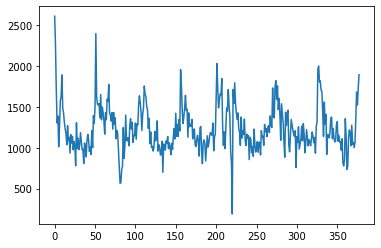

In [254]:
plt.plot(diff_data.difference)

Text(0.5, 1.0, 'Difference in Total Deaths per week of Cal and Florida')

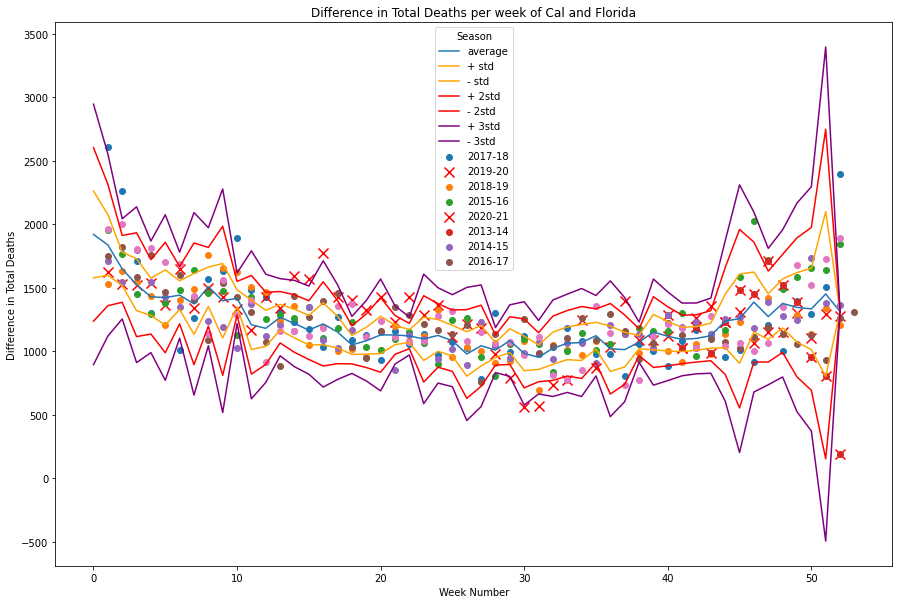

In [255]:
# calculate average and standard deviation of each week in non-covid period
week_numbers = set(diff_data.week.values)
average = []
standard_dev = []

for week in week_numbers:
    # remove covid related data
    data = diff_data[diff_data["season"] != "2020-21"]
    data = diff_data[diff_data["season"] != "2019-20"]
    
    # get weekly death data across remaining seasons
    weekXdata = data[data["week"]== week]["difference"].values
    
    # calculate statistics 
    average.append(np.mean(weekXdata))
    standard_dev.append(np.std(weekXdata))
    
average = np.array(average)
std_dev = np.array(standard_dev)

plt.figure(figsize=(15,10))
legend = []
for season in set(diff_data.season):
    week_number = diff_data[diff_data.season == season].week.values
    death_count = diff_data[diff_data.season == season].difference.values
    if season == "2020-21":
        plt.scatter(week_number, death_count, c = 'red', marker='x',s=100)
    if season == "2019-20":
        plt.scatter(week_number, death_count, c = 'red', marker='x',s=100)
    else:
        plt.scatter(week_number, death_count)

    legend.append(season)

plt.plot(average)
plt.plot(average + std_dev, color = 'orange')
plt.plot(average - std_dev, color = 'orange')
plt.plot(average + 2*std_dev, color = 'red')
plt.plot(average - 2*std_dev, color = 'red')
plt.plot(average + 3*std_dev, color = 'purple')
plt.plot(average - 3*std_dev, color = 'purple')
stat_legend = ['average','+ std','- std','+ 2std','- 2std','+ 3std','- 3std']

plt.legend(stat_legend+legend, title = "Season")
plt.ylabel("Difference in Total Deaths")
plt.xlabel("Week Number")
plt.title("Difference in Total Deaths per week of Cal and Florida")


In [323]:
# population taken from https://www.macrotrends.net/states/north-dakota/population

California_pop = {'2020-21':39368078,
                  '2019-20':39437610,
                  '2018-19':39437463,
                  '2017-18':39337785,
                  '2016-17':39149186,
                  '2015-16':38904296,
                  '2014-15':38586706,
                  '2013-14':38253768,
                  '2012-13':37944551
                 }
Florida_pop = {'2020-21':21733312,
                  '2019-20':21492056,
                  '2018-19':21254926,
                  '2017-18':20977089,
                  '2016-17':20627237,
                  '2015-16':20219111,
                  '2014-15':19853880,
                  '2013-14':19551678,
                  '2012-13':19302016
              }

# get data from https://gis.cdc.gov/grasp/fluview/mortality.html
data = pd.read_csv("State_Custom_Data.csv")
data_flo = data[data["SUB AREA"]=="Florida"]
data_cal = data[data["SUB AREA"]=="California"]

# get difference in data
diff_data = pd.DataFrame(columns = ['season','week','difference'])
for season in set(data.SEASON):
    for week in set(data.WEEK):
        # exception handling because we don't have all weeks in all seasons
        try:
            florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
            california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
            
            florida_death /= Florida_pop[season]
            california_death /= California_pop[season]
            diff_data = diff_data.append({'season': season,
                             'week':week,
                             'difference': california_death-florida_death
                             },ignore_index =True)
        except:
            pass

<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: U

<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: U

<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: U

<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: U

<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: U

<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: U

<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWar

<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: U

<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: U

<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: U

<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: U

<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: U

<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  florida_death = int(data_flo[data_flo['SEASON']==season][data_flo['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  california_death = int(data_cal[data_cal['SEASON']==season][data_cal['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-323-1a323cd81228>:33: U

Text(0.5, 1.0, 'Difference in Death Rates per week (California minus Florida')

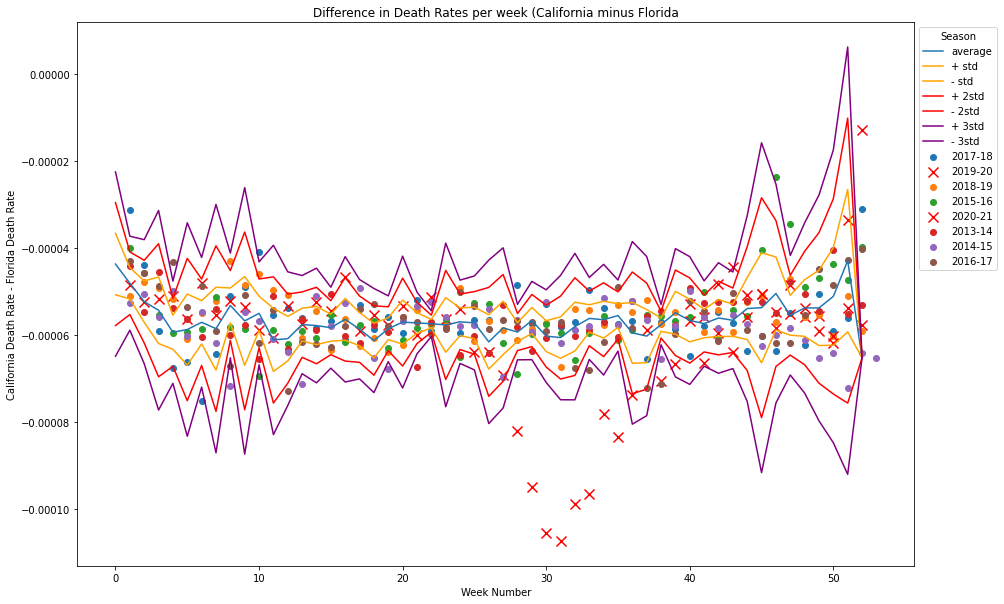

In [324]:
week_numbers = set(diff_data.week.values)
average = []
standard_dev = []

for week in week_numbers:
    # remove covid related data
    data = diff_data[diff_data["season"] != "2020-21"]
    data = diff_data[diff_data["season"] != "2019-20"]
    
    # get weekly death data across remaining seasons
    weekXdata = data[data["week"]== week]["difference"].values
    
    # calculate statistics 
    average.append(np.mean(weekXdata))
    standard_dev.append(np.std(weekXdata))
    
average = np.array(average)
std_dev = np.array(standard_dev)

plt.figure(figsize=(15,10))
legend = []
for season in set(diff_data.season):
    week_number = diff_data[diff_data.season == season].week.values
    death_count = diff_data[diff_data.season == season].difference.values
    if season == "2020-21":
        plt.scatter(week_number, death_count, c = 'red', marker='x',s=100)
    elif season == "2019-20":
        plt.scatter(week_number, death_count, c = 'red', marker='x',s=100)
    else:
        plt.scatter(week_number, death_count)

    legend.append(season)

plt.plot(average)
plt.plot(average + std_dev, color = 'orange')
plt.plot(average - std_dev, color = 'orange')
plt.plot(average + 2*std_dev, color = 'red')
plt.plot(average - 2*std_dev, color = 'red')
plt.plot(average + 3*std_dev, color = 'purple')
plt.plot(average - 3*std_dev, color = 'purple')
stat_legend = ['average','+ std','- std','+ 2std','- 2std','+ 3std','- 3std']

plt.legend(stat_legend+legend, title = "Season",bbox_to_anchor=(1,1), loc="upper left")
plt.ylabel("California Death Rate - Florida Death Rate")
plt.xlabel("Week Number")
plt.title("Difference in Death Rates per week (California minus Florida")


There are some possible confounding variables here. From, https://www.census.gov/quickfacts/FL and https://www.census.gov/quickfacts/CA we can see that 

Percent of Pop about 65
FL = 20.9
CA = 14.8

This makes Florida possibly more susceptible because elderly are more likely to die.

Persons per household
FL = 2.65
CA = 2.95

This makes California possibly more susceptible because once a single person is infected, the entire household is likely to become so as well. 

Persons in Poverty, Percent
FL = 12.7
CA = 11.8

This makes Florida possibly more susceptible because people in poverty generally have fewer/less functional hygiene facilities. 

Finally, just from the data plotted, CA has a generally more healthy populations as measured by death rate. Covid probalby has a nonlinear effect, making less healthy populations much more succeptible to death than otherwise. Therefore, the above plots would not take this into account. 

In [325]:
# population taken from https://www.macrotrends.net/states/north-dakota/population

ND_pop = {'2020-21':765309,
                  '2019-20':763724,
                  '2018-19':760062,
                  '2017-18':756755,
                  '2016-17':756114,
                  '2015-16':755537,
                  '2014-15':738736,
                  '2013-14':723149,
                  '2012-13':702227
                 }

# south dakota doesn't have easily accessible data. 
# From https://www.census.gov/quickfacts/fact/table/SD,ND/PST045219 we can say that 
# SD has a population of 
SD_factor = 884659/762062
# more than North Dakota. Let us adjust the data accordingly. 

# get data
data = pd.read_csv("State_Custom_Data.csv")
data_sd = data[data["SUB AREA"]=="South Dakota"]
data_nd = data[data["SUB AREA"]=="North Dakota"]

# get difference in data
diff_data_dakota = pd.DataFrame(columns = ['season','week','difference'])
for season in set(data.SEASON):
    for week in set(data.WEEK):
        # exception handling because we don't have all weeks in all seasons
        try:
            nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
            sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
            
            
            sd_death /= ND_pop[season]
            sd_death /= SD_factor
            nd_death /= ND_pop[season]
            diff_data_dakota = diff_data_dakota.append({'season': season,
                             'week':week,
                             'difference': nd_death-sd_death
                             },ignore_index =True)
        except:
            pass

<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be

<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be

<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be

<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be

<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be

<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be

<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be

<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be

<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be

<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be

<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sd_death = int(data_sd[data_sd['SEASON']==season][data_sd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd_death = int(data_nd[data_nd['SEASON']==season][data_nd['WEEK']==week]["TOTAL DEATHS"].values[0].replace(',',''))
<ipython-input-325-4ea482b5f020>:32: UserWarning: Boolean Series key will be

Text(0.5, 1.0, 'Difference in Death Rates per week (North minus South Dakota)')

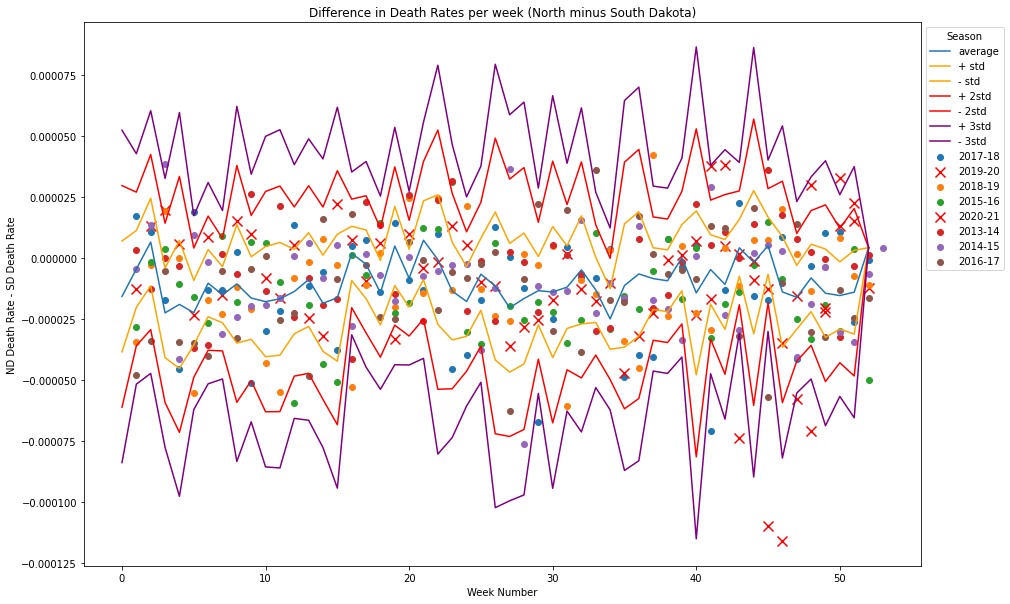

In [326]:
week_numbers = set(diff_data_dakota.week.values)
average = []
standard_dev = []

for week in week_numbers:
    # remove covid related data
    diff_data_no_covid = diff_data_dakota[diff_data_dakota["season"] != "2020-21"]
    diff_data_no_covid = diff_data_no_covid[diff_data_no_covid["season"] != "2019-20"]
    
    # get weekly death data across remaining seasons
    weekXdata = diff_data_no_covid[diff_data_no_covid["week"]== week]["difference"].values
    
    # calculate statistics 
    average.append(np.mean(weekXdata))
    standard_dev.append(np.std(weekXdata))
    
average = np.array(average)
std_dev = np.array(standard_dev)

plt.figure(figsize=(15,10))
legend = []
for season in set(diff_data_dakota.season):
    week_number = diff_data_dakota[diff_data_dakota.season == season].week.values
    death_count = diff_data_dakota[diff_data_dakota.season == season].difference.values
    if season == "2020-21":
        plt.scatter(week_number, death_count, c = 'red', marker='x',s=100)
    elif season == "2019-20":
        plt.scatter(week_number, death_count, c = 'red', marker='x',s=100)
    else:
        plt.scatter(week_number, death_count)

    legend.append(season)

plt.plot(average)
plt.plot(average + std_dev, color = 'orange')
plt.plot(average - std_dev, color = 'orange')
plt.plot(average + 2*std_dev, color = 'red')
plt.plot(average - 2*std_dev, color = 'red')
plt.plot(average + 3*std_dev, color = 'purple')
plt.plot(average - 3*std_dev, color = 'purple')
stat_legend = ['average','+ std','- std','+ 2std','- 2std','+ 3std','- 3std']

plt.legend(stat_legend+legend, title = "Season",bbox_to_anchor=(1,1), loc="upper left")
plt.ylabel("ND Death Rate - SD Death Rate")
plt.xlabel("Week Number")
plt.title("Difference in Death Rates per week (North minus South Dakota)")


'2016-17'